## 作業
在鐵達尼資料集中，   
可以用今天範例中提到的三種辨識異常值的方法，  
以 training data 為資料集。  
1.觀察票價是否有異常值的現象?  
2.你覺得找出的異常是真的異常? 你覺得需要做處理嗎?  
(試著講出自己的想法。)  


### 資料
鐵達尼號 train 資料集


In [1]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
df_train = pd.read_csv("Titanic_train.csv")

### 探索性分析:
*  觀察-是否有異常值  
我們來觀察一下 Fare 變數吧!!

## Q1:觀察票價是否有異常值的現象?

## 方法1
* 進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。  


In [76]:
#print(df_train['Fare'])
print(df_train['Fare'].describe())
print(df_train['Fare'][df_train['Fare'] == 0]) # Zero fare is not reasonable.
print(df_train['Fare'][df_train['Fare'] == 0].count())
print('Zero fare is not reasonable')

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
179    0.0
263    0.0
271    0.0
277    0.0
302    0.0
413    0.0
466    0.0
481    0.0
597    0.0
633    0.0
674    0.0
732    0.0
806    0.0
815    0.0
822    0.0
Name: Fare, dtype: float64
15
Zero fare is not reasonable


## 方法 2
* 進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。  


In [66]:
mean, std = df_train['Fare'].mean(), df_train['Fare'].std()
print(df_train['Fare'][abs(df_train['Fare'] - mean) > 3 * std])
print(df_train['Fare'][abs(df_train['Fare'] - mean) > 3 * std].count())

27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64
20


## 方法3-盒鬚圖判別法(IQR method)

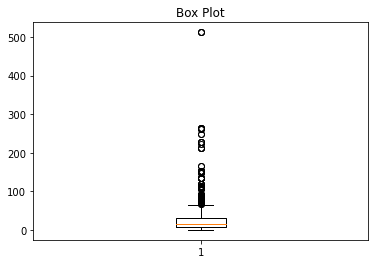

In [68]:
plt.boxplot(df_train['Fare'][~np.isnan(df_train['Fare'])], whis=1.5)
plt.title('Box Plot')
plt.show()

## Q2:你覺得找出的異常是真的異常? 你覺得需要做處理嗎?


In [75]:
print(df_train[['Cabin', 'Fare']][df_train['Fare'] > 150])
print('''
According to Cabin record, a Fare record might represent the prize for more than one cabin. So the data of fare should be further processed. ex. Normalized to prize per cabin.
''')

               Cabin      Fare
27       C23 C25 C27  263.0000
88       C23 C25 C27  263.0000
118          B58 B60  247.5208
258              NaN  512.3292
268             C125  153.4625
297          C22 C26  151.5500
299          B58 B60  247.5208
305          C22 C26  151.5500
311  B57 B59 B63 B66  262.3750
318               C7  164.8667
332              C91  153.4625
341      C23 C25 C27  263.0000
377              C82  211.5000
380              NaN  227.5250
438      C23 C25 C27  263.0000
498          C22 C26  151.5500
527              C95  221.7792
557              NaN  227.5250
609             C125  153.4625
679      B51 B53 B55  512.3292
689               B5  211.3375
700          C62 C64  227.5250
708              NaN  151.5500
716              C45  227.5250
730               B5  211.3375
737             B101  512.3292
742  B57 B59 B63 B66  262.3750
779               B3  211.3375
856              NaN  164.8667

According to Cabin record, a Fare record might represent the prize fo